# Data anonymisation of all things that need to be anonymised
- Name - sampleID; Ogi (remove first and last name)
- gender - leave it for both
- birth date - birth year banding; LS
- country_of_birth - continent; LS
- current country - leave it
- phone number - remove
- postcode - area; Asude
- national_insurance_number - remove
- bank_account_number - remove
- weight - band into range; Asude (leave it for researchers)
- height - band into range; Asude (leave it for researchers)
- blood group - keep for researcher, remove for signs for public
- avg_n_drinks_per_week - keep for researchers, band for public
- avg_n_cigret_per_week - keep for researchers, band for public
- education_level - leave it for researchers, band for public
- n_countries_visited - band; Ogi

## Setting up

In [1]:
import random
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import datetime
import pycountry_convert as pc

In [16]:
data = pd.read_csv('customer_information.csv')
data.head(10)

,given_name,surname,gender,birthdate,country_of_birth,current_country,phone_number,postcode,national_insurance_number,bank_account_number,cc_status,weight,height,blood_group,avg_n_drinks_per_week,avg_n_cigret_per_week,education_level,n_countries_visited
0,Lorraine,Reed,F,05/07/1984,Armenia,United Kingdom,(07700) 900876,LS5 8FN,ZZ 19 48 92 T,51157818,0,74.2,1.73,B+,6.5,218.8,phD,48
1,Edward,Williams,M,17/06/1997,Northern Mariana Islands,United Kingdom,(07700) 900 877,M0U 1RA,ZZ 753513 T,103328715,0,69.4,1.74,O-,0.7,43.6,primary,42
2,Hannah,Turner,F,15/06/1990,Venezuela,United Kingdom,+447700 900148,SO1 8HZ,ZZ 947196 T,69342327,0,98.6,1.88,B+,7.8,59.1,bachelor,9
3,Christine,Osborne,F,29/07/2000,Eritrea,United Kingdom,+447700 900112,B18 8LW,ZZ 39 69 47 T,85159170,0,62.0,1.56,O+,4.6,284.2,primary,32
4,Francesca,Yates,F,04/11/1968,Ecuador,United Kingdom,07700 900 413,TQ2 6BE,ZZ 30 98 91 T,11399166,0,96.3,1.81,A-,4.4,348.8,secondary,34
5,Joanne,Middleton,F,15/10/1963,Argentina,United Kingdom,+44(0)7700 900 032,CM7H 0XS,ZZ 141314 T,66208707,0,43.4,1.59,A-,5.7,219.3,other,7
6,Joel,Spencer,M,08/07/1982,Cook Islands,United Kingdom,(07700) 900579,L02 5WL,ZZ 97 20 76 T,108456420,0,77.5,1.55,B+,2.4,79.5,secondary,34
7,Leonard,Marshall,M,20/01/1987,Saint Vincent and the Grenadines,United Kingdom,07700 900508,CR3 5ZN,ZZ 599246 T,126109351,0,59.0,1.89,A+,8.4,48.0,other,24
8,Tracy,Smith,F,07/04/1999,Kiribati,United Kingdom,+447700 900 960,WR96 2TD,ZZ278789T,10754702,0,83.1,1.42,A+,1.2,148.1,secondary,17
9,Gavin,Kay,M,21/12/1998,Belize,United Kingdom,+44(0)7700900206,KT5A 0AW,ZZ 131934 T,52176102,0,80.0,1.74,A+,5.2,47.0,bachelor,47


## Name - sampleID

## Birthdate - Birth year

In [ ]:
# Birth years
birthDate = pd.to_datetime(data.birthdate, format='mixed')
data['birth_year'] = pd.DatetimeIndex(birthDate).year
data.head(10)

# finding number of unique values per band
unique_birthdate_counts = data['birth_year'].value_counts()
unique_birthdate_counts
# potential problem: only 5 1955

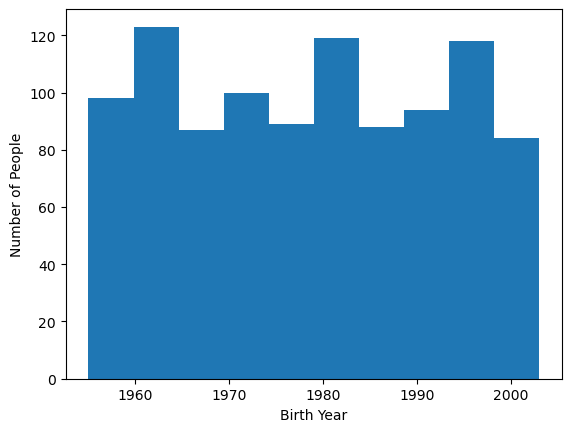

In [4]:
plt.hist(data["birth_year"])
plt.xlabel("Birth Year")
plt.ylabel("Number of People")
plt.show()

## Country of birth - continent

In [18]:
def country_to_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return 'Unknown'

In [19]:
data['continent_of_birth'] = data['country_of_birth'].apply(country_to_continent)
data.head(10)

# finding the number of unique continent
unique_continent_counts = data['continent_of_birth'].value_counts()
unique_continent_counts
# potential problem: antartica has 3 counts and there are 72 unknowns - need to go through unknowns

continent_of_birth
Europe           213
Africa           208
Asia             189
North America    137
Oceania          112
Unknown           72
South America     66
Antarctica         3
Name: count, dtype: int64

In [20]:
# Going through the unknowns
unknown_continent_rows = data[data['continent_of_birth'] == 'Unknown']

# Select only the 'country_of_birth' and 'continent' columns
unknown_continent_rows = unknown_continent_rows[['given_name','country_of_birth', 'continent_of_birth']]

# Display these rows
print(unknown_continent_rows)

# finding the number of unique country of birth for unknowns
unique_country_counts = unknown_continent_rows['country_of_birth'].value_counts()
unique_country_counts

    given_name                                   country_of_birth  \
14       Bruce                                              Korea   
17   Francesca                              Palestinian Territory   
18       Grace                                   Saint Barthelemy   
21   Frederick                                       Saint Helena   
22      Connor                                              Korea   
..         ...                                                ...   
910    Barbara  British Indian Ocean Territory (Chagos Archipe...   
915       John               United States Minor Outlying Islands   
933     Joanne       Antarctica (the territory South of 60 deg S)   
950     Elliot                                            Reunion   
966   Clifford                                              Korea   

    continent_of_birth  
14             Unknown  
17             Unknown  
18             Unknown  
21             Unknown  
22             Unknown  
..                 ..

country_of_birth
Korea                                                  12
Western Sahara                                          6
Slovakia (Slovak Republic)                              6
Saint Barthelemy                                        5
Pitcairn Islands                                        5
Holy See (Vatican City State)                           5
Reunion                                                 4
United States Minor Outlying Islands                    4
Antarctica (the territory South of 60 deg S)            4
Svalbard & Jan Mayen Islands                            4
Bouvet Island (Bouvetoya)                               4
Saint Helena                                            3
Cote d'Ivoire                                           3
British Indian Ocean Territory (Chagos Archipelago)     2
Palestinian Territory                                   2
Libyan Arab Jamahiriya                                  1
Timor-Leste                                            

In [26]:
# Manually re-classifying the unknowns by creating a dictionary
continent_mapping = {
    'Korea': 'Asia',
    'Western Sahara': 'Africa',
    'Slovakia (Slovak Republic)': 'Europe',
    'Saint Barthelemy': 'North America',
    'Pitcairn Islands': 'Oceania',
    'Holy See': 'Europe',
    'Reunion': 'Africa',
    'United States Minor Outlying Islands': 'North America',
    'Antarctica (the territory South of 60 deg S)': 'Antarctica',
    'Svalbard & Jan Mayen Islands': 'Europe',
    'Bouvet Island (Bouvetoya)': 'Antarctica',
    'Saint Helena': 'Africa',
    "Cote d'Ivoire": 'Africa',
    'British Indian Ocean Territory (Chagos Archipelago)': 'Asia',
    'Palestinian Territory': 'Asia',
    'Libyan Arab Jamahiriya': 'Africa',
    'Timor-Leste': 'Asia',
    'Netherlands Antilles': 'North America'
}

# Applying the mapping to the dataframe
data['continent_of_birth'] = data['country_of_birth'].map(continent_mapping)

In [27]:
# finding the number of unique continent
unique_continent_counts = data['continent_of_birth'].value_counts()
unique_continent_counts

continent_of_birth
Asia             17
Africa           17
North America    10
Europe           10
Antarctica        8
Oceania           5
Name: count, dtype: int64

In [28]:
continent_labels = ["Europe", "Africa", "Asia", "North America", "Oceania", "Unknown", "South America", "Antarctica"]

continent_counts = data["continent_of_birth"].value_counts()
continent_count_in_order = []
for i in continent_labels:
    continent_count_in_order.append(counts[i])

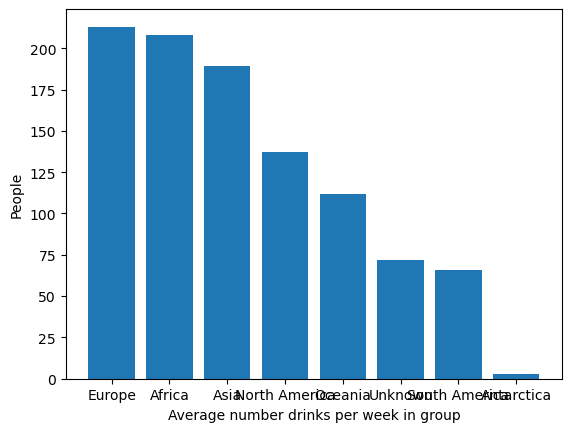

In [29]:
plt.bar(continent_labels, continent_count_in_order)
plt.xlabel("Average number drinks per week in group")
plt.ylabel("People")
plt.show()

## Postcode - area

## Weight - ranges

In [14]:
# Before banding, determining range of weight by finding minimum and maximum values
min_weight = data['weight'].min()
max_weight = data['weight'].max()

print(f"Minimum weight: {min_weight}")
print(f"Maximum weight: {max_weight}")

Minimum weight: 35.0
Maximum weight: 100.0


## Height - ranges

## Countries visited - bands